# Fraud Detection
MSCA 31015 Data Science for Consulting

## EDA & Feature Engineering

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics as mt
import scikitplot as skplt
warnings.simplefilter('ignore')
sns.set()

In [20]:
train = pd.read_csv('fraudTrain.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])
test = pd.read_csv('fraudTest.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])
df = pd.concat([train, test])
df.shape

(1852394, 22)

In [21]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

In [23]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Cleaning and PreProcessing DateTime Features

In [24]:
# trans_date_trans_time
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_ym'] = df['trans_date_trans_time'].dt.to_period('M')

In [25]:
df['agg'] = 1
df['index'] = df['trans_date_trans_time']
df = df.set_index('index').sort_index()

# rolling: 60 day transaction amount average by card number
df_amt_60d = df.groupby('cc_num')['amt'].rolling('60D').mean().shift().reset_index().fillna(0)
df_amt_60d.columns = ['cc_num','trans_date','avg_amt_60d']
df_amt_60d['trans_date'] = df_amt_60d['trans_date'].dt.date
df_amt_60d = df_amt_60d.groupby(['cc_num','trans_date'])['avg_amt_60d'].min().reset_index()

# rolling: 60 day transactions by card number
df_60d = df.groupby('cc_num')['agg'].rolling('60D').count().shift().reset_index().fillna(0)
df_60d.columns = ['cc_num','trans_date','60d']
df_60d['trans_date'] = df_60d['trans_date'].dt.date
df_60d = df_60d.groupby(['cc_num','trans_date'])['60d'].min().reset_index()

# merge by cc_num, trans_date
df = df.merge(df_amt_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')\
    .merge(df_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')
df[['avg_amt_60d','60d']]= df[['avg_amt_60d','60d']].fillna(0)

In [26]:
# age = trans_date_trans_time - dob
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

In [27]:
# Creating Dummy Variables for the various Categories and the Gender
df = pd.concat([df, pd.get_dummies(df[['gender', 'category']], drop_first=True)], axis=1)

In [28]:
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,1,0,0,0,0


## Visualizing Features

### Describing the Categorical Features

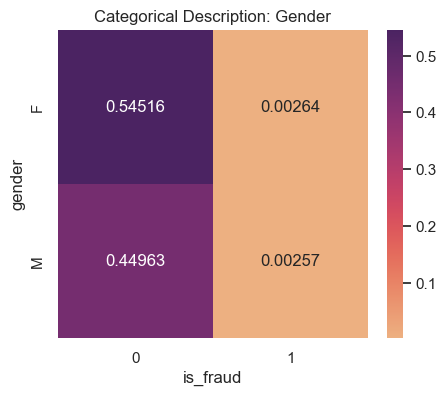

In [29]:
# gender
gr = pd.crosstab(df['gender'], df['is_fraud'])/len(df)
plt.figure(figsize=(5,4))
confusion_matrix_plot = sns.heatmap(gr, annot=round(gr,5), fmt='', cmap='flare')
confusion_matrix_plot.set_title("Categorical Description: Gender")
None

### Amount vs Fraud

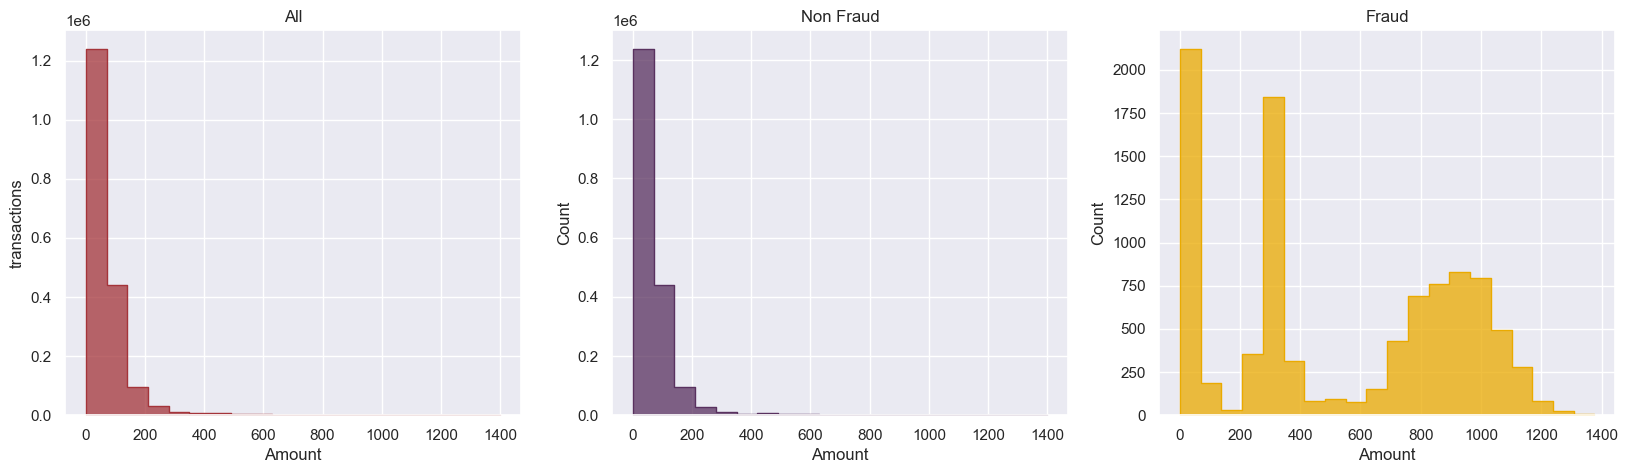

In [30]:
fig_amt, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('transactions')
ax[0].set_xlabel('Amount')
ax[1].set_xlabel('Amount')
ax[2].set_xlabel('Amount')
ax[0].set_title('All')
ax[1].set_title('Non Fraud')
ax[2].set_title('Fraud')

all_detections = sns.histplot(df.loc[df['amt']<=1400, 'amt'], bins=20,ax=ax[0],legend=False,element="step",color="#A4343A")
non_fraud = sns.histplot(df.loc[(df['amt']<=1400) & (df['is_fraud']==0), 'amt'], bins=20,ax=ax[1],legend=False,element="step",color="#59315F")
fraud = sns.histplot(df.loc[(df['amt']<=1400) & (df['is_fraud']==1), 'amt'], bins=20,ax=ax[2],legend=False,element="step",color="#EAAA00");

### Average Rolling 60 Day Transaction Amount vs Fraud

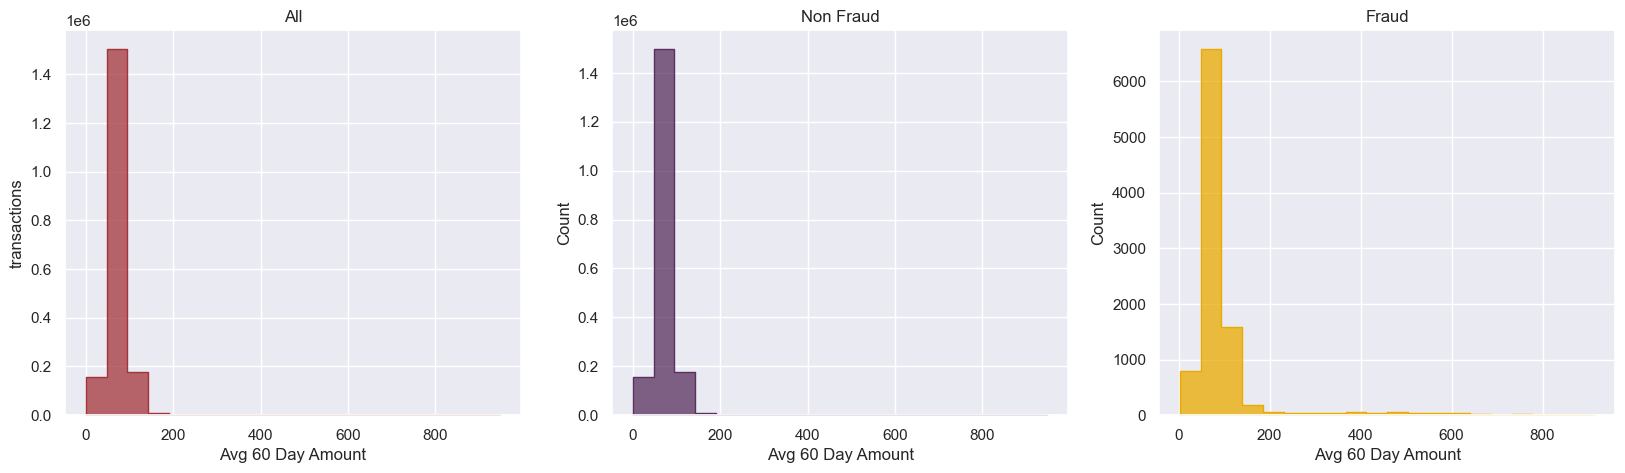

In [31]:
fig_avg_amt, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('transactions')
ax[0].set_xlabel('Avg 60 Day Amount')
ax[1].set_xlabel('Avg 60 Day Amount')
ax[2].set_xlabel('Avg 60 Day Amount')
ax[0].set_title('All')
ax[1].set_title('Non Fraud')
ax[2].set_title('Fraud')

all_detections_avg_amt = sns.histplot(df["avg_amt_60d"], bins=20,ax=ax[0],legend=False,element="step",color="#A4343A")
non_fraud_avg_amt = sns.histplot(df.loc[(df['is_fraud']==0), 'avg_amt_60d'], bins=20,ax=ax[1],legend=False,element="step",color="#59315F")
fraud_avg_amt = sns.histplot(df.loc[(df['is_fraud']==1), 'avg_amt_60d'], bins=20,ax=ax[2],legend=False,element="step",color="#EAAA00");

### Rolling 60 Day Transaction Average vs Fraud

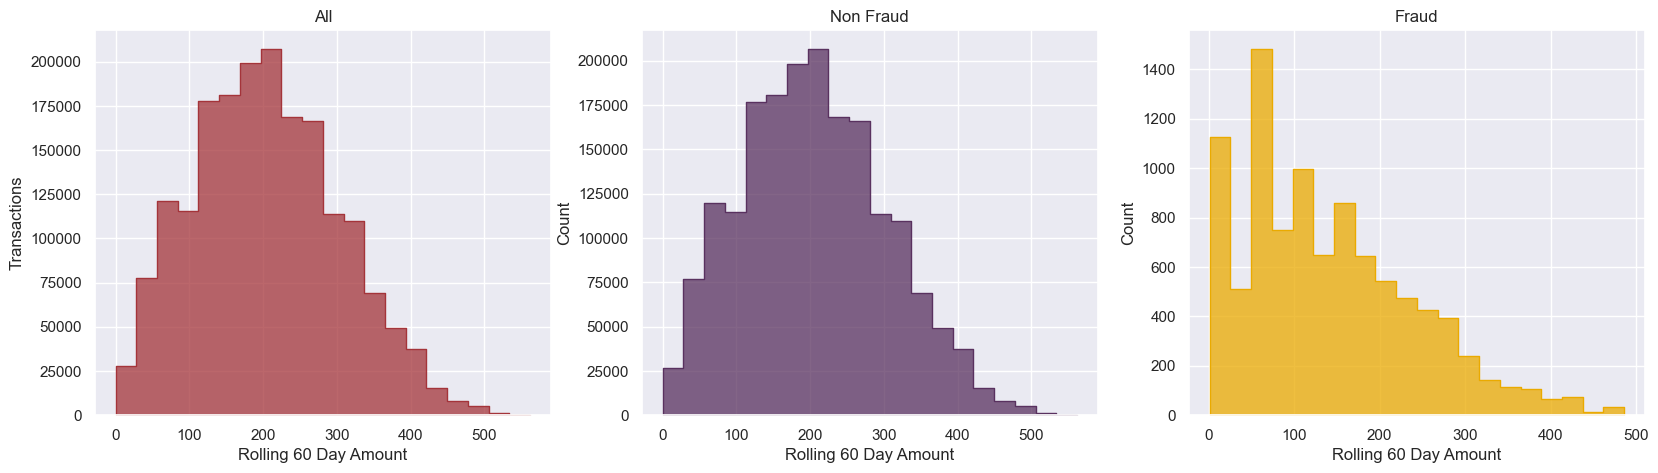

In [32]:
fig_60D, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('Transactions')
ax[0].set_xlabel('Rolling 60 Day Amount')
ax[1].set_xlabel('Rolling 60 Day Amount')
ax[2].set_xlabel('Rolling 60 Day Amount')
ax[0].set_title('All')
ax[1].set_title('Non Fraud')
ax[2].set_title('Fraud')

all_detections_60D = sns.histplot(df["60d"], bins=20,ax=ax[0],legend=False,element="step",color="#A4343A")
non_fraud_60D = sns.histplot(df.loc[(df['is_fraud']==0), '60d'], bins=20,ax=ax[1],legend=False,element="step",color="#59315F")
fraud_avg_60D = sns.histplot(df.loc[(df['is_fraud']==1), '60d'], bins=20,ax=ax[2],legend=False,element="step",color="#EAAA00");

### Transaction Hour vs Fraud

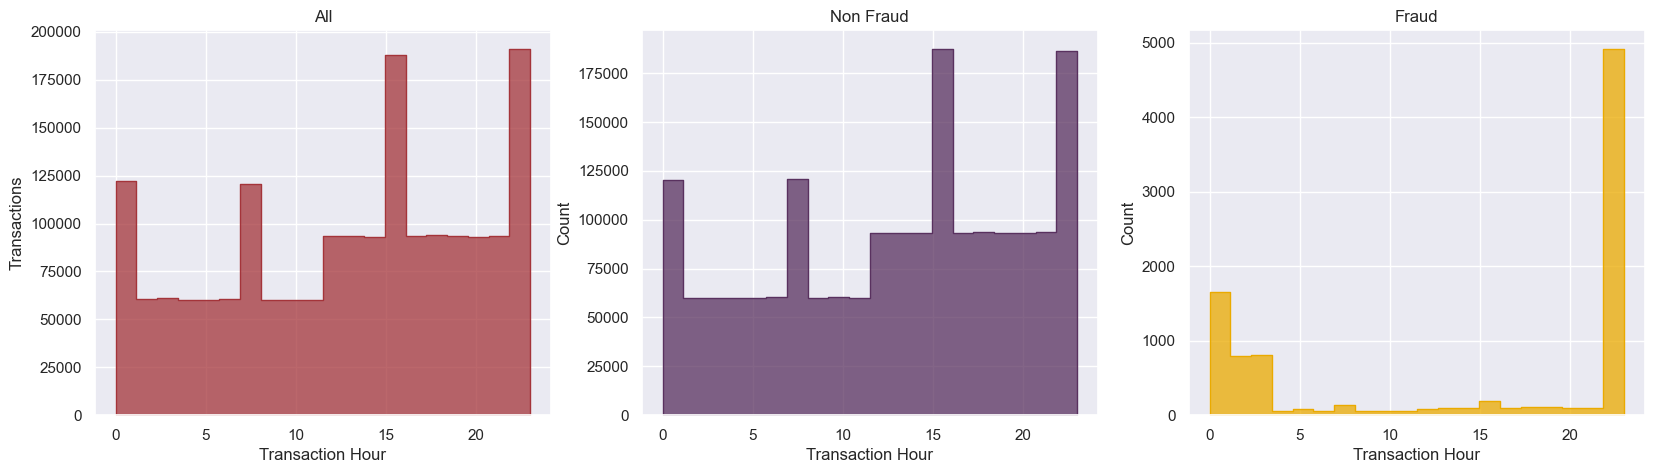

In [33]:
fig_hours, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('Transactions')
ax[0].set_xlabel('Transaction Hour')
ax[1].set_xlabel('Transaction Hour')
ax[2].set_xlabel('Transaction Hour')
ax[0].set_title('All')
ax[1].set_title('Non Fraud')
ax[2].set_title('Fraud')
all_trans_hours = sns.histplot(df["trans_hour"], bins=20,ax=ax[0],legend=False,element="step",color="#A4343A")
non_fraud_trans_hours = sns.histplot(df.loc[(df['is_fraud']==0), 'trans_hour'], bins=20,ax=ax[1],legend=False,element="step",color="#59315F")
fraud_trans_hours = sns.histplot(df.loc[(df['is_fraud']==1), 'trans_hour'], bins=20,ax=ax[2],legend=False,element="step",color="#EAAA00");

### Age vs Fraud

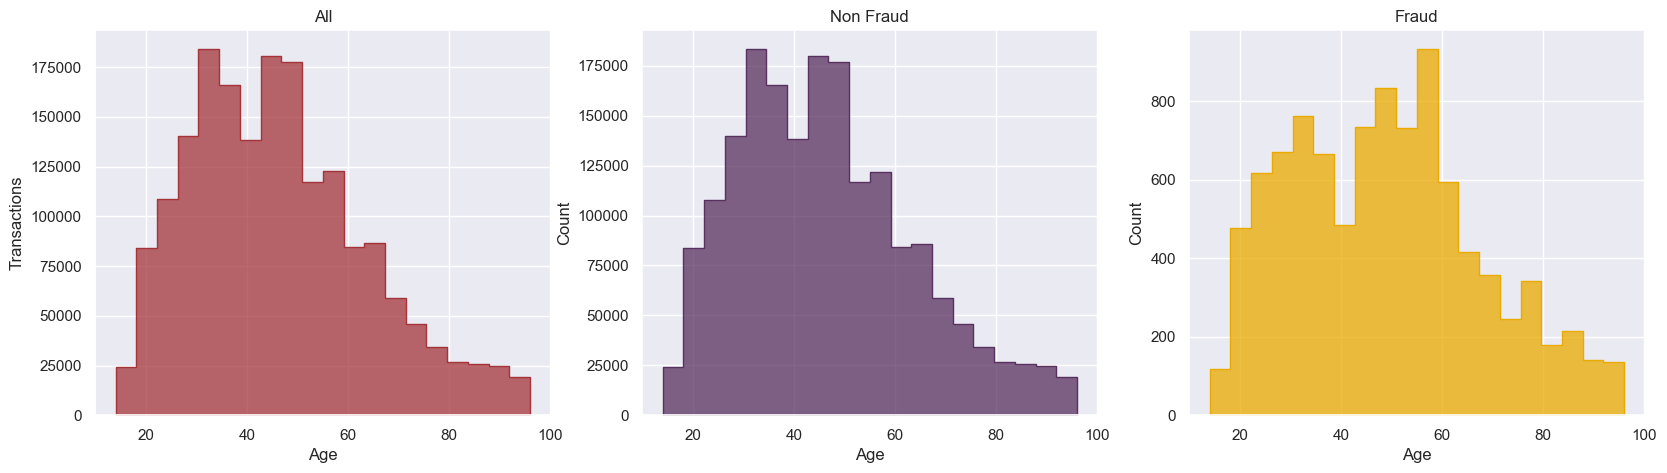

In [34]:
fig_age, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('Transactions')
ax[0].set_xlabel('Age')
ax[1].set_xlabel('Age')
ax[2].set_xlabel('Age')
ax[0].set_title('All')
ax[1].set_title('Non Fraud')
ax[2].set_title('Fraud')

all_detections_age = sns.histplot(df["age"], bins=20,ax=ax[0],legend=False,element="step",color="#A4343A")
non_fraud__age = sns.histplot(df.loc[(df['is_fraud']==0), 'age'], bins=20,ax=ax[1],legend=False,element="step",color="#59315F")
fraud_avg_ageD = sns.histplot(df.loc[(df['is_fraud']==1), 'age'], bins=20,ax=ax[2],legend=False,element="step",color="#EAAA00");

### Category vs Fraud

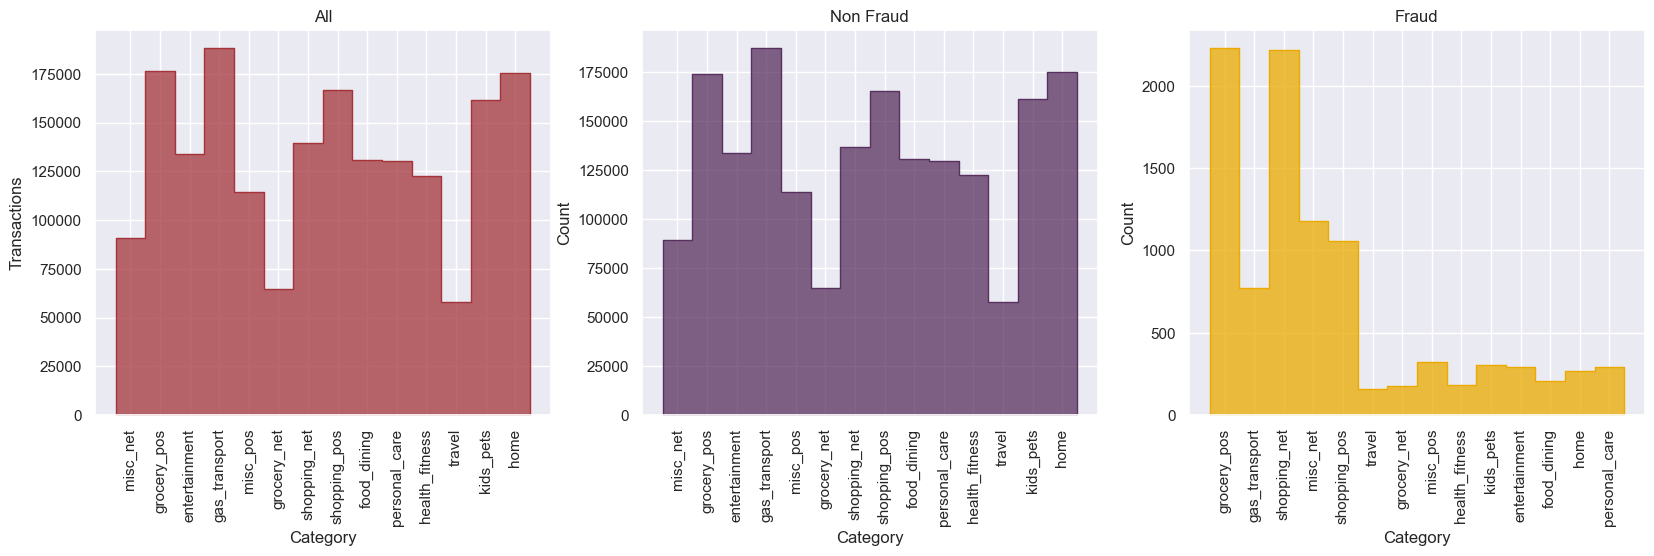

In [35]:
fig_category, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('Transactions')
ax[0].set_xlabel('Category')
ax[1].set_xlabel('Category')
ax[2].set_xlabel('Category')
ax[0].set_title('All')
ax[1].set_title('Non Fraud')
ax[2].set_title('Fraud')

all_detections_category = sns.histplot(df["category"], bins=20,ax=ax[0],legend=False,element="step",color="#A4343A")
all_detections_category.set_xticklabels(all_detections_category.get_xticklabels(), rotation=90)
non_fraud_category = sns.histplot(df.loc[(df['is_fraud']==0), 'category'], bins=20,ax=ax[1],legend=False,element="step",color="#59315F")
non_fraud_category.set_xticklabels(non_fraud_category.get_xticklabels(), rotation=90)
fraud_category = sns.histplot(df.loc[(df['is_fraud']==1), 'category'], bins=20,ax=ax[2],legend=False,element="step",color="#EAAA00")
fraud_category.set_xticklabels(fraud_category.get_xticklabels(), rotation=90)
None

### Describing the Numerical Data

In [36]:
numerical_df = df[["amt","avg_amt_60d","age","60d","city_pop","lat","long","merch_lat","merch_long"]]
numerical_df.describe()

,amt,avg_amt_60d,age,60d,city_pop,lat,long,merch_lat,merch_long
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,7.006357e+01,6.928470e+01,4.626617e+01,2.050095e+02,8.864367e+04,3.853931e+01,-9.022783e+01,3.853898e+01,-9.022794e+01
std,1.592540e+02,2.209038e+01,1.741239e+01,9.826523e+01,3.014876e+05,5.071470e+00,1.374789e+01,5.105604e+00,1.375969e+01
min,1.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00,2.300000e+01,2.002710e+01,-1.656723e+02,1.902742e+01,-1.666716e+02
25%,9.640000e+00,5.437001e+01,3.300000e+01,1.310000e+02,7.410000e+02,3.466890e+01,-9.679800e+01,3.474012e+01,-9.689944e+01
50%,4.745000e+01,6.360569e+01,4.400000e+01,2.000000e+02,2.443000e+03,3.935430e+01,-8.747690e+01,3.936890e+01,-8.744069e+01
75%,8.310000e+01,8.320580e+01,5.700000e+01,2.710000e+02,2.032800e+04,4.194040e+01,-8.015800e+01,4.195626e+01,-8.024511e+01
max,2.894890e+04,9.488182e+02,9.600000e+01,5.620000e+02,2.906700e+06,6.669330e+01,-6.795030e+01,6.751027e+01,-6.695090e+01


## Modeling

### Creating the Correlation Diagram to identify Correlated Features

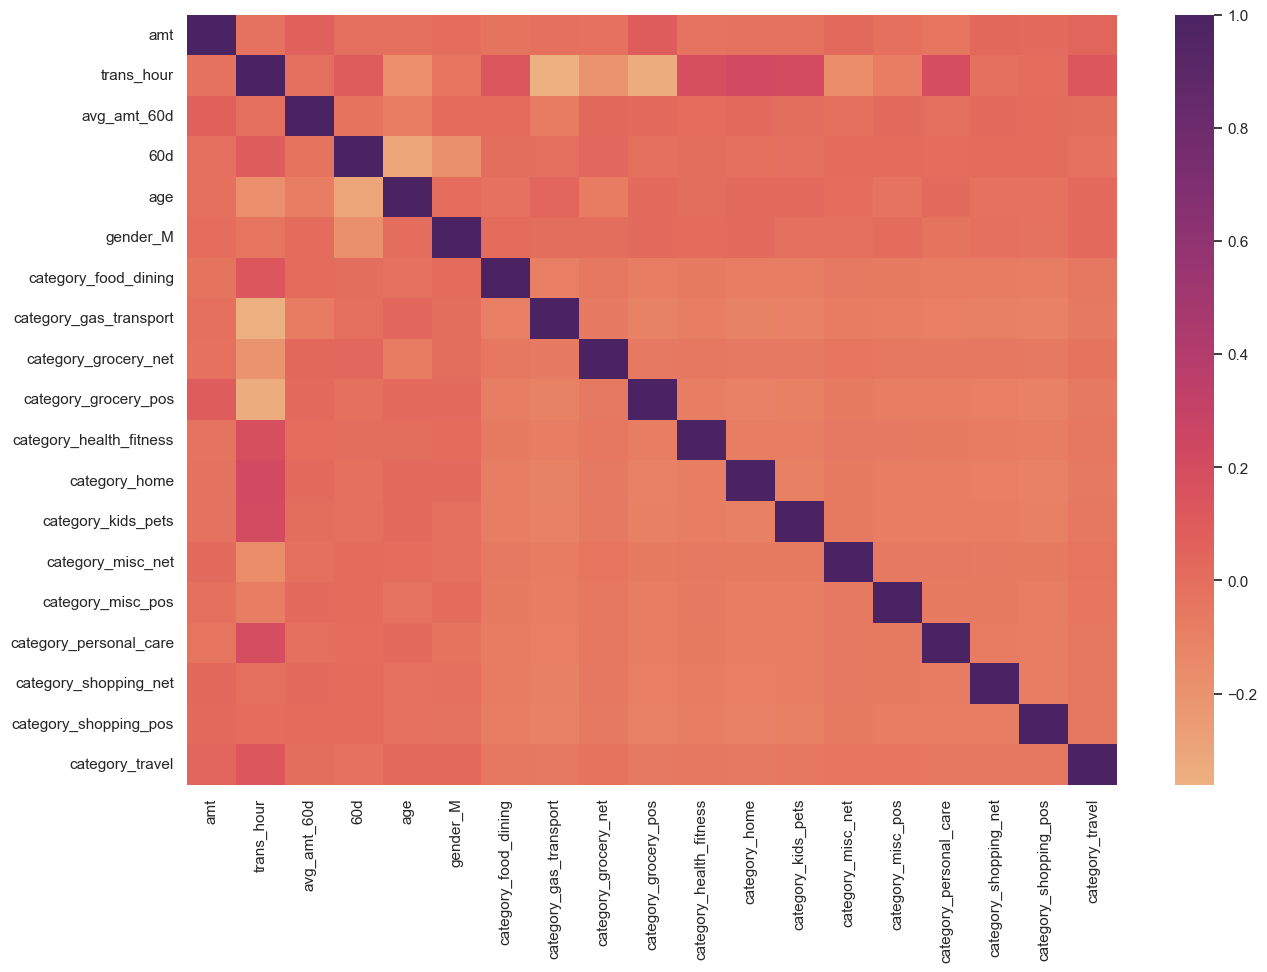

In [37]:
cols = ['amt', 'trans_hour', 'avg_amt_60d', '60d', 'age', 'gender_M',
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos',
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos',
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']
plt.figure(figsize=(15,10))
corr = df[cols].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='flare')
None

### Oversampling The Data

In [38]:
df['is_fraud'].value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [39]:
fraud_oversample = df[df['is_fraud'] == 1].sample(df[df['is_fraud'] == 0]['amt'].count(), replace=True)
df_oversampled = pd.concat([df[df['is_fraud'] == 0], fraud_oversample], axis=0)

In [40]:
df_oversampled.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,0,0,1,0,0,0,0


###  Splitting the Data into the Train and Test Data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled[cols], df_oversampled['is_fraud'], train_size=2/3)

Creating Functions to easily plot the various metric of the models.

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
def plot_model(cnf,cfr,batch):
    fig_n, axe = plt.subplots(1, 2, figsize=(13, 4.5))
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_percentages = ["{0:.2%}".format(value) for value in
                         cnf.flatten()/np.sum(cnf)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    cnf = cnf/np.sum(cnf)
    confusion_matrix_plots = sns.heatmap(cnf, annot=labels, fmt='', cmap='flare',ax=axe[0])
    axe[0].set_title("Confusion Matrix for: "+batch)
    axe[1].set_title("Classification Report for: "+batch)
    cfr = pd.DataFrame(cfr).transpose()
    cfr = cfr[['precision', 'recall', 'f1-score']]
    class_report_plots = sns.heatmap(cfr,cmap='flare',annot=cfr,ax=axe[1])

def model_results(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plot_model(confusion_matrix(y_train, y_train_pred),classification_report(y_train, y_train_pred,output_dict=True),"Train")
    plot_model(confusion_matrix(y_test, y_test_pred),classification_report(y_test, y_test_pred,output_dict=True),"Test")
    return model

### Creating A Logistic Regression Model

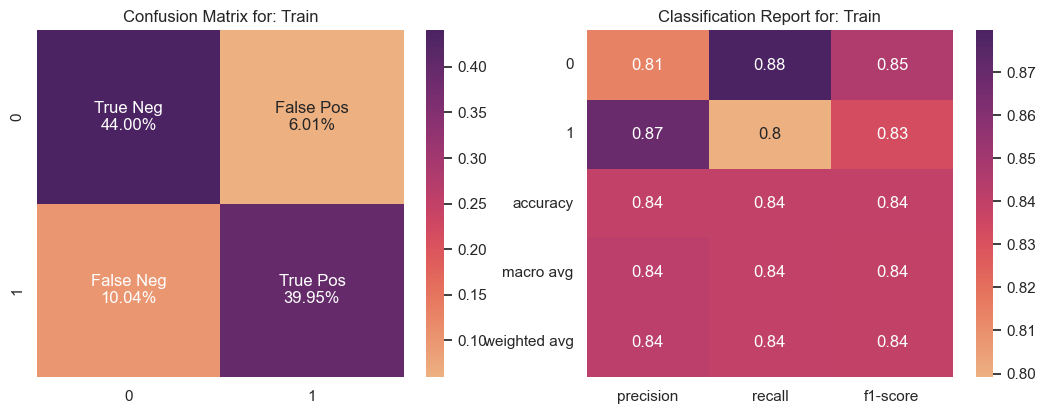

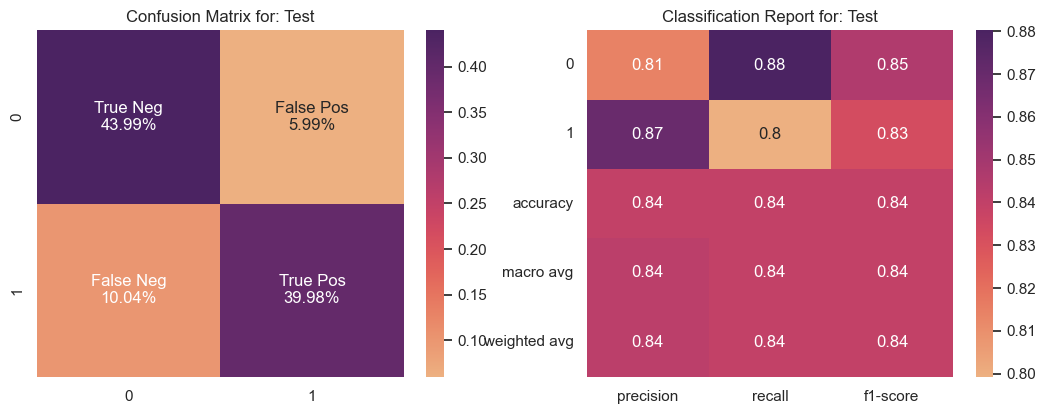

In [43]:
from sklearn.linear_model import LogisticRegression
log_model = model_results(LogisticRegression())
log_model_proba = log_model.predict_proba(X_test)

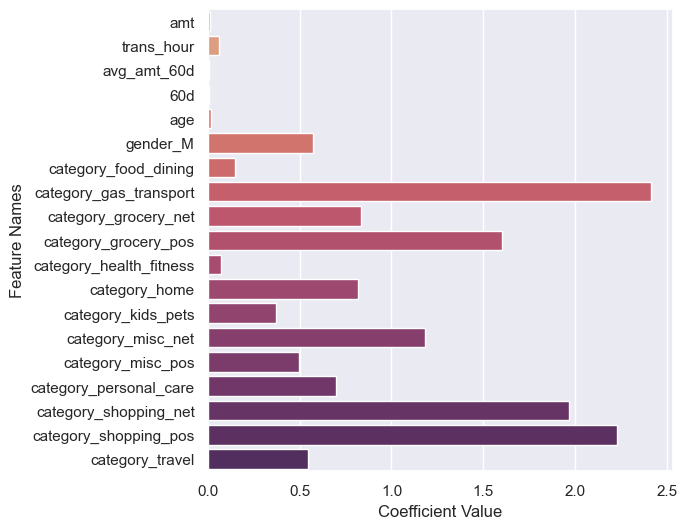

In [44]:
feature_values = log_model.coef_
coeff_table = pd.DataFrame({"Feature Names": X_train.columns, "Coefficient Value": abs(feature_values[0])})
log_coeff, axes = plt.subplots(figsize=(6, 6))
coeffs = sns.barplot(coeff_table,y="Feature Names",x="Coefficient Value",ax=axes,palette="flare")
None

### Creating A Decision Tree Model

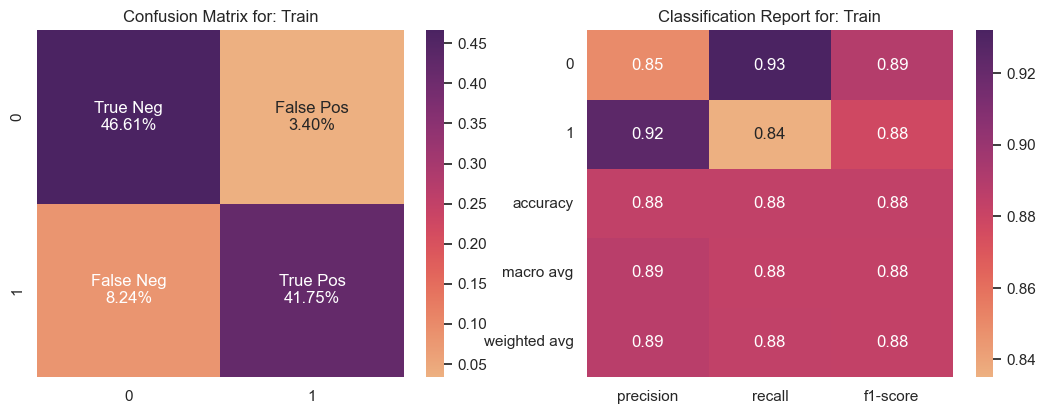

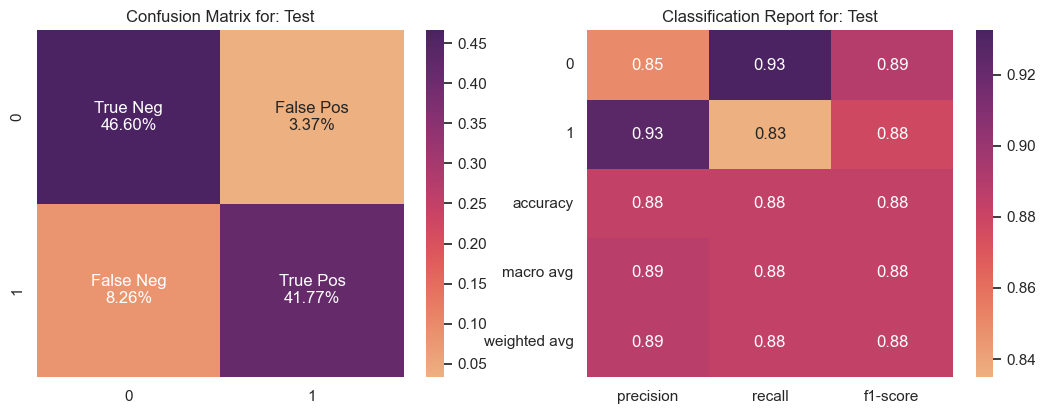

In [45]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = model_results(DecisionTreeClassifier(max_depth=3))
decision_tree_proba = decision_tree_model.predict_proba(X_test)

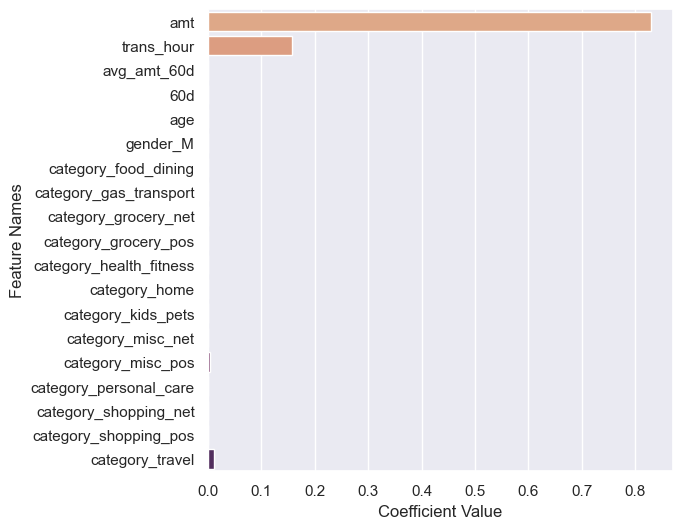

In [46]:
feature_values = decision_tree_model.feature_importances_
coeff_table = pd.DataFrame({"Feature Names": X_train.columns, "Coefficient Value": abs(feature_values)})
decision_tree_coeff, axes = plt.subplots(figsize=(6,6))
coeffs = sns.barplot(coeff_table,y="Feature Names",x="Coefficient Value",ax=axes,palette="flare")
None

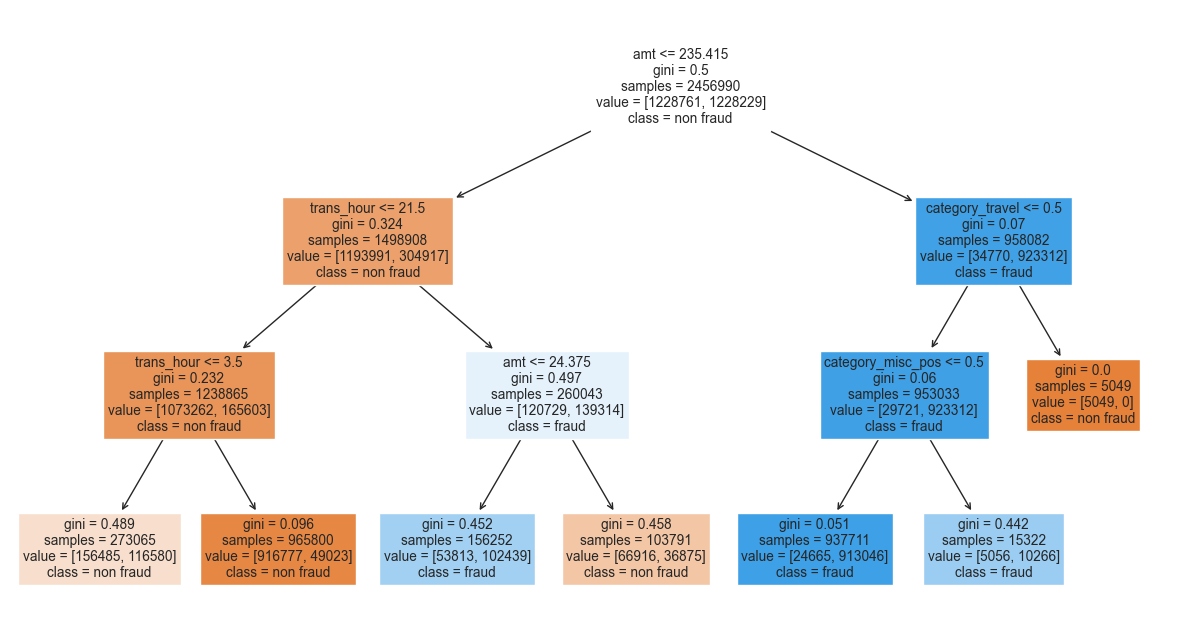

In [47]:
plt.figure(figsize=(15, 8))
from sklearn import tree
tree.plot_tree(decision_tree_model, max_depth=3, feature_names=cols, class_names=['non fraud', 'fraud'], filled=True);

### Creating A Random Forest Model

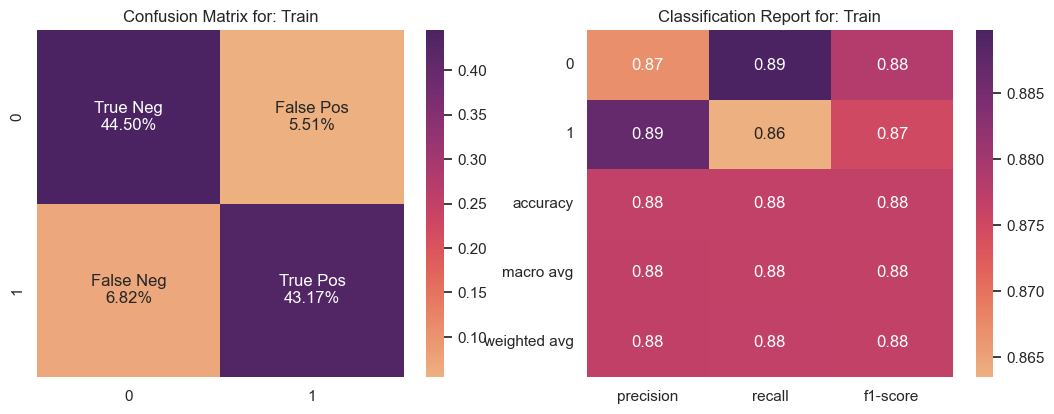

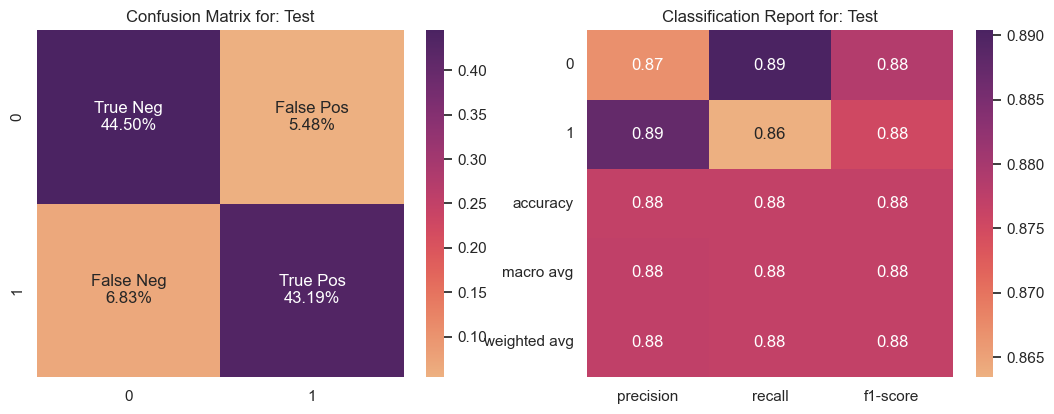

In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = model_results(RandomForestClassifier(n_estimators=10, max_depth=3))
random_forest_proba = random_forest_model.predict_proba(X_test)

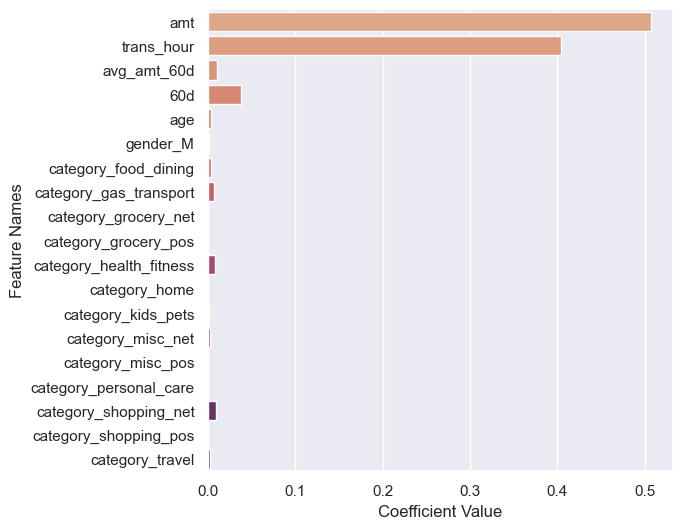

In [49]:
feature_values = random_forest_model.feature_importances_
coeff_table = pd.DataFrame({"Feature Names": X_train.columns, "Coefficient Value": abs(feature_values)})
random_forest_coeff, axes = plt.subplots(figsize=(6,6))
coeffs = sns.barplot(coeff_table,y="Feature Names",x="Coefficient Value",ax=axes,palette="flare")
None

### Creating A XGBoost Model

[17:39:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


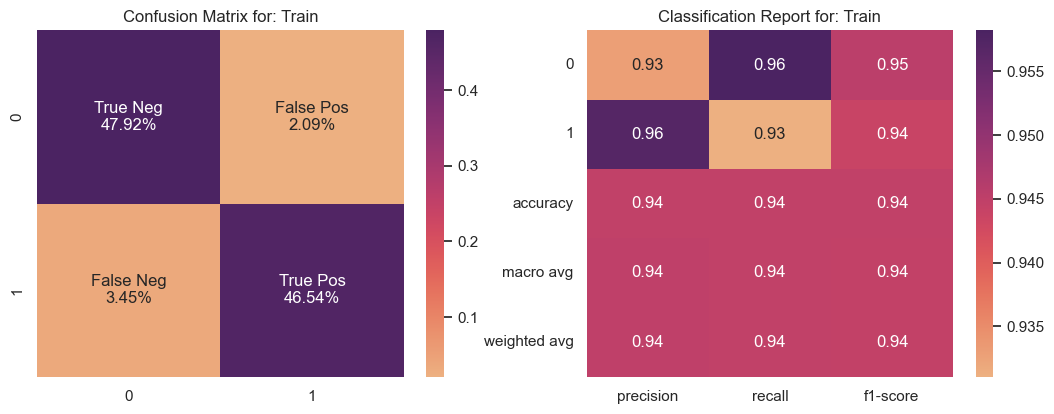

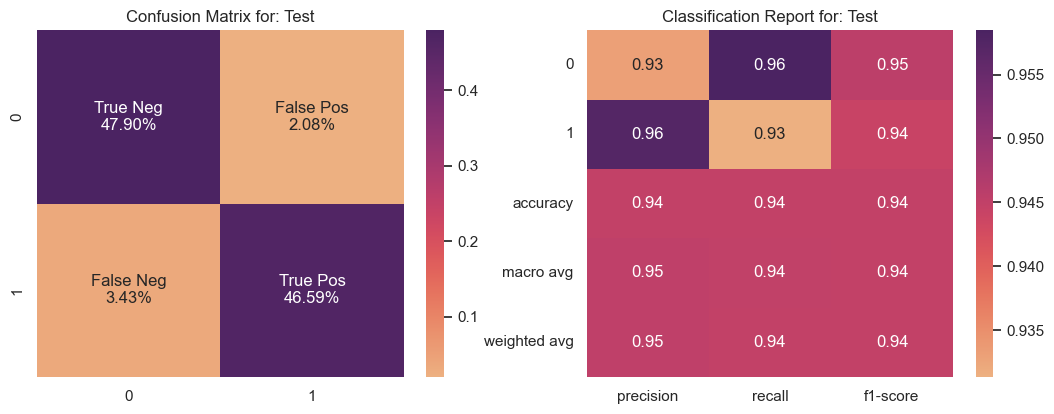

In [50]:
from xgboost import XGBClassifier
XGBoost_model = model_results(XGBClassifier(n_estimators=10, max_depth=3))
XGBoost_pred_proba= XGBoost_model.predict_proba(X_test)
None

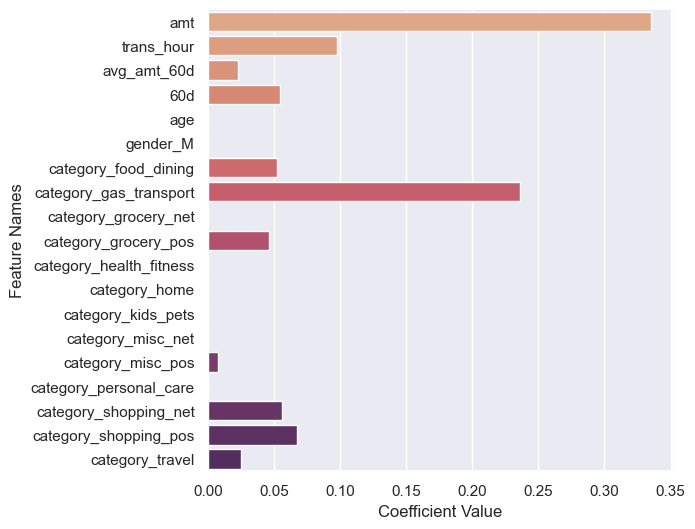

In [51]:
feature_values = XGBoost_model.feature_importances_
coeff_table = pd.DataFrame({"Feature Names": X_train.columns, "Coefficient Value": abs(feature_values)})
XGBoost_coeff, axes = plt.subplots(figsize=(6,6))
coeffs = sns.barplot(coeff_table,y="Feature Names",x="Coefficient Value",ax=axes,palette="flare")
None

## Generating ROC Curves, Gains Curves and Lift Curves for the Models

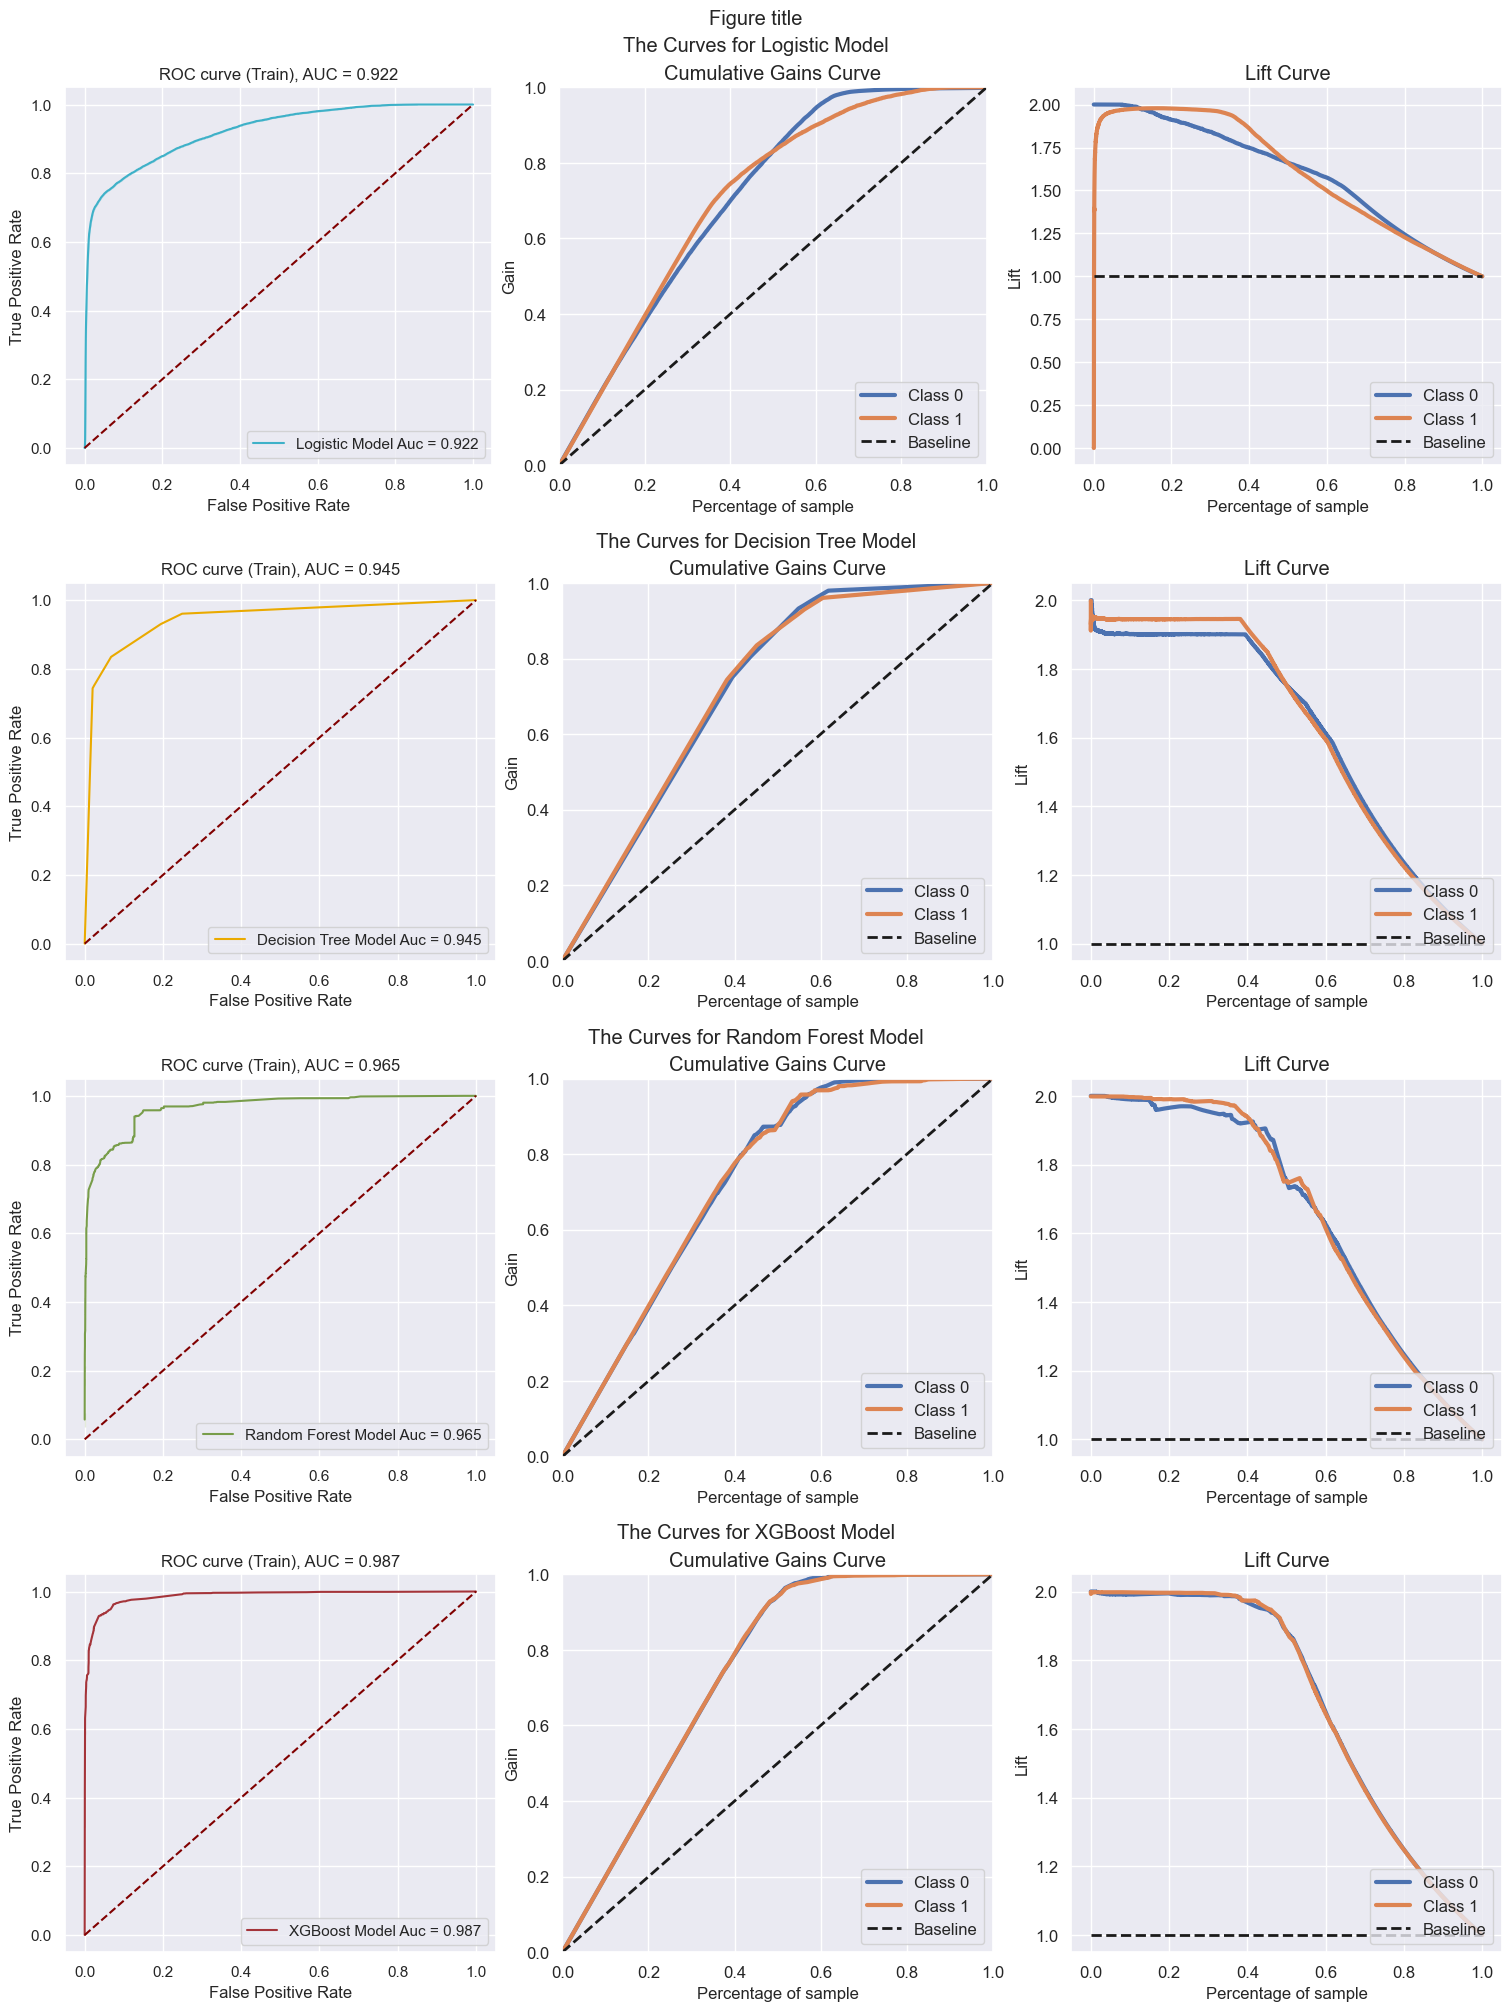

In [52]:

models_list = [{"name": "Logistic Model","proba":log_model_proba,"color": "#3eb1c8"},{"name": "Decision Tree Model","proba":decision_tree_proba,"color": "#EAAA00"},{"name": "Random Forest Model","proba":random_forest_proba,"color": "#789D4A"},{"name": "XGBoost Model","proba":XGBoost_pred_proba,"color": "#A4343A"}]

roc_fig = plt.figure(constrained_layout=True,figsize=(15, 20))
roc_fig.suptitle('Figure title')

# create 3x1 subfigs
subfigs = roc_fig.subfigures(nrows=4, ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle('The Curves for '+ models_list[row]["name"])
    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    fpr, tpr, _ = mt.roc_curve(y_test, models_list[row]["proba"][::, 1])
    auc = mt.roc_auc_score(y_test, models_list[row]["proba"][::, 1])
    rounded_auc = round(auc.astype('float'),3)
    curve1 = sns.lineplot(x=fpr, y=tpr, color=models_list[row]["color"],ax=axs[0],label=models_list[row]["name"]+" Auc = "+repr(rounded_auc))
    curve2 = sns.lineplot([0, 1], color='Maroon', linestyle='--',ax=axs[0])
    axs[0].set_title('ROC curve (Train), AUC = '+repr(rounded_auc))
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Positive Rate")
    skplt.metrics.plot_cumulative_gain(y_test, models_list[row]["proba"],ax=axs[1])
    skplt.metrics.plot_lift_curve(y_test,models_list[row]["proba"],ax=axs[2])